# Homework 5
Julia Kaznowska <br>
Warsaw University of Technology <br>
Faculty of Mathematics and Information Science <br>
WB XAI tabular

## Importing libraries, model and data

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go

random.seed(2137)

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

import pickle
gb = pickle.load(open('GradientBoosting', 'rb'))

X = pickle.load(open('X', 'rb'))
y = pickle.load(open('y', 'rb'))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [2]:
gb.fit(X_train, y_train)

import dalex as dx
gb_exp = dx.Explainer(gb, X_train, y_train, label = "Gradient Boosting")

Preparation of a new explainer is initiated

  -> data              : 16512 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 16512 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Gradient Boosting
  -> predict function  : <function yhat_default at 0x0000022FFC5C31F0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.47e+04, mean = 2.07e+05, max = 5.8e+05
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -2.77e+05, mean = -4.09e-12, max = 3.39e+05
  -> model_info        : package sklearn

A new explainer has been created!


## Partial Dependence Profiles 

In order to make the file smaller I had to reduce the number of observations that was taken for plotting PDP, it doesn't affect the results in any way though.

Exporting notebook with plots made them disappear, so I had to change them to images. Code is still included for reproductivity.

In [3]:
#pd_gb = gb_exp.model_profile(N = 25)
#pd_gb.plot(geom = 'profiles', variables = X_train.columns.tolist())
#pd_gb.result['_label_'] = 'PD profiles'

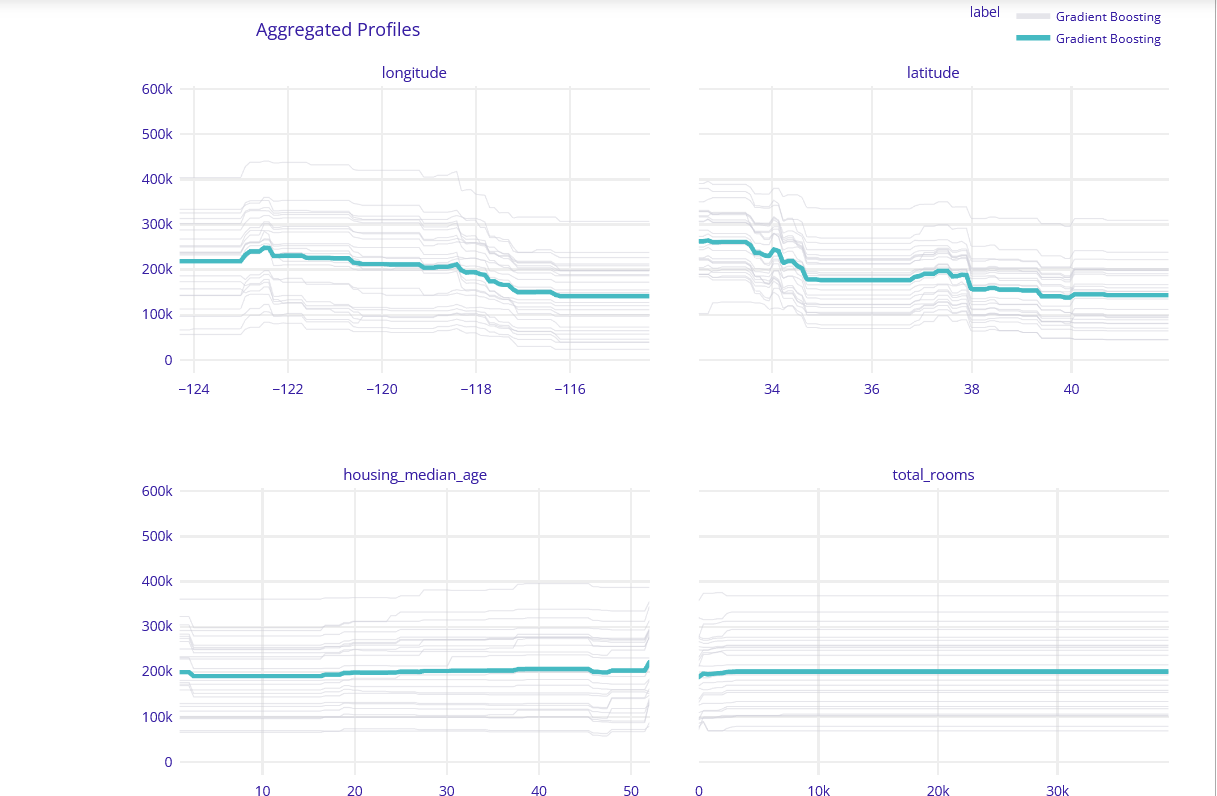

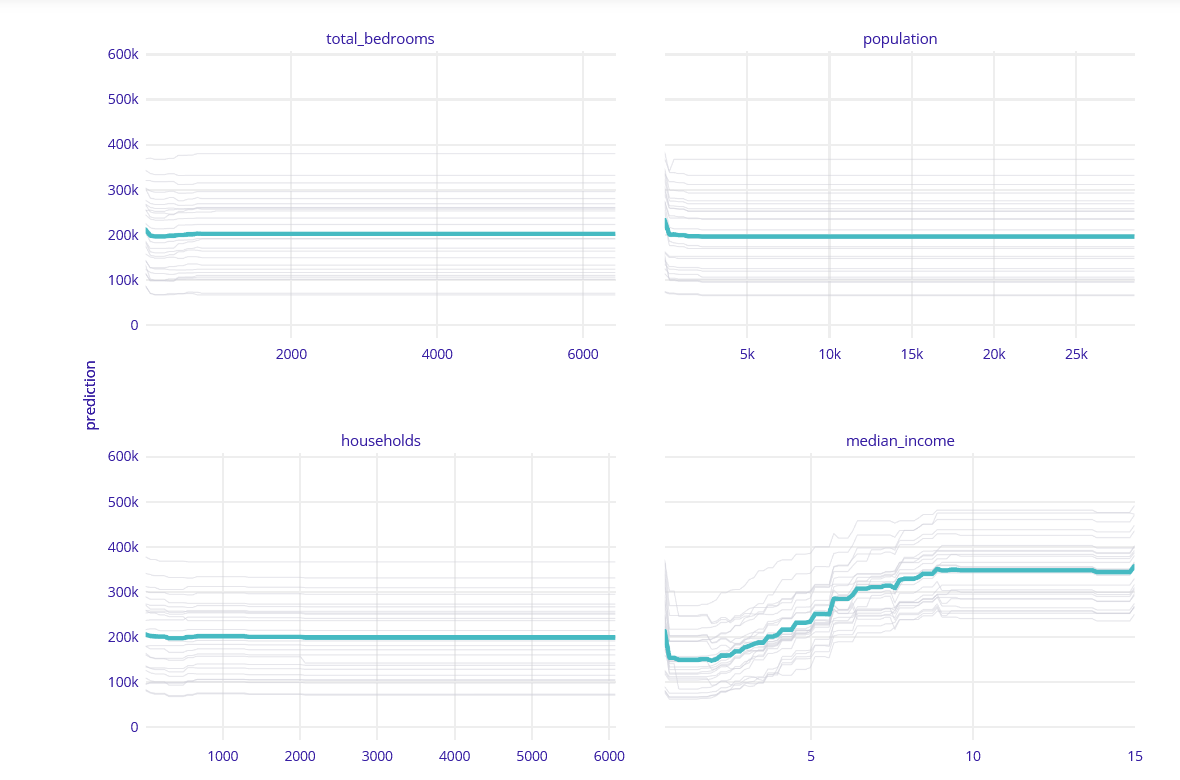

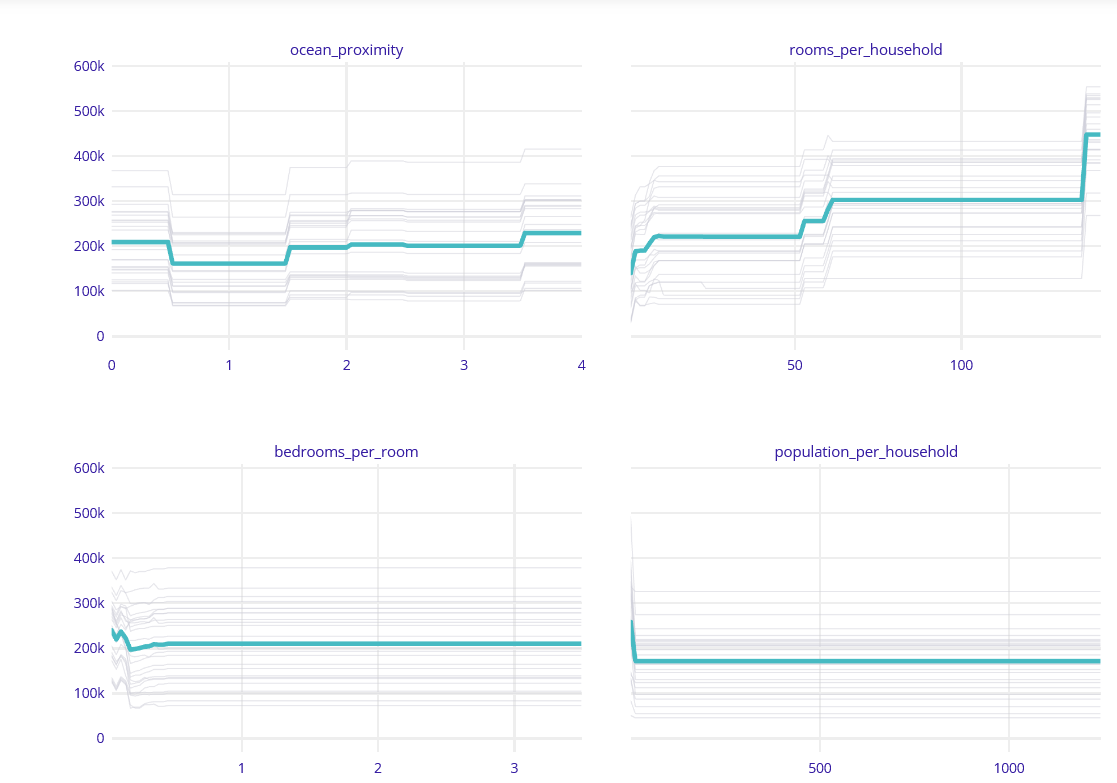

In [4]:
from IPython.display import Image
from IPython.display import display
pdp1 = Image(filename='pdp1.png')
pdp2 = Image(filename='pdp2.png')
pdp3 = Image(filename='pdp3.png') 
display(pdp1, pdp2, pdp3)

As we can see, PD profiles for all the variables do not show any correlations between them. We can say that because every observation for every variable is plotted parallel to one another.

## Accumulated Local Dependence 

At first plots for ALE and PDP were separated and then joined together, but because of their similarities I decided to just show them together.

In [6]:
#ale_gb = gb_exp.model_profile(type = 'accumulated')
#ale_gb.result['_label_'] = 'AL profiles'

In [7]:
#ale_gb.plot(pd_gb)

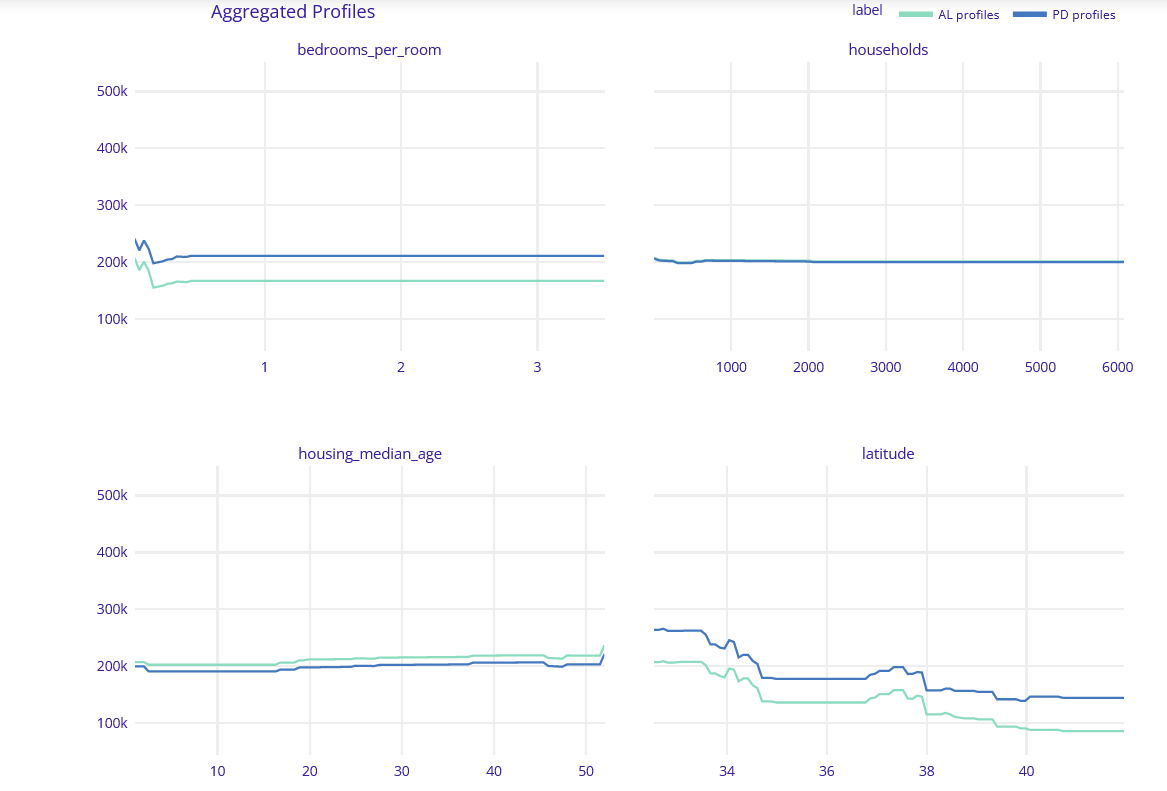

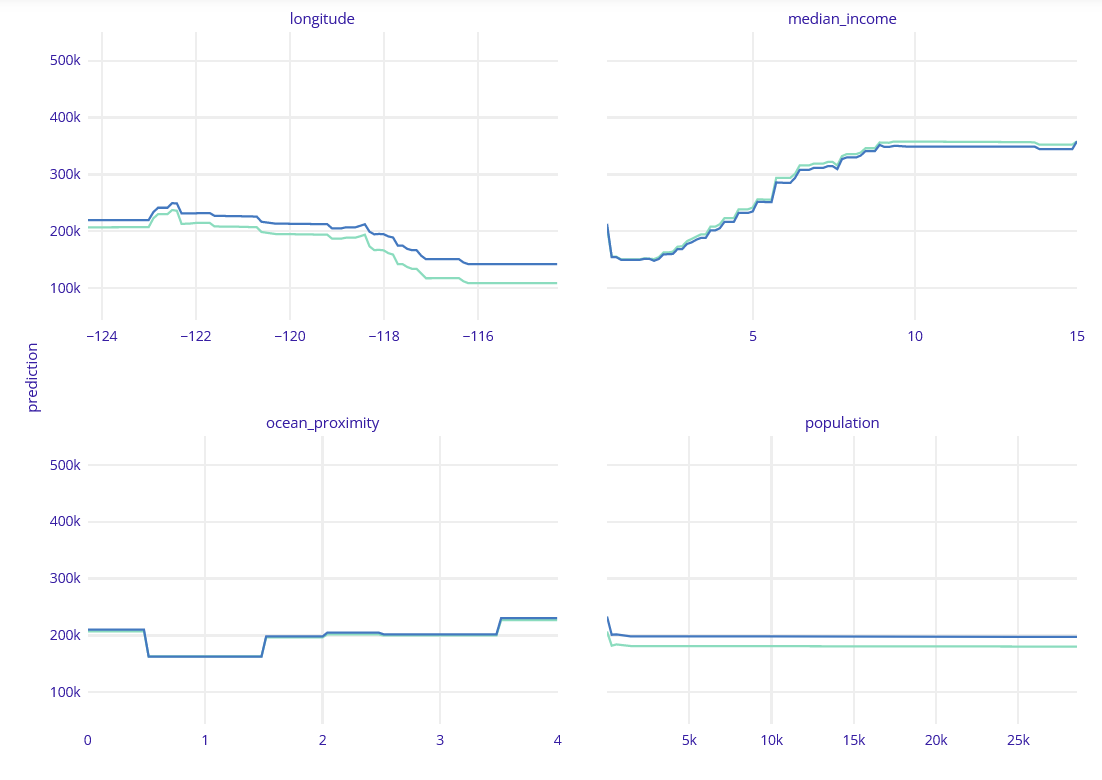

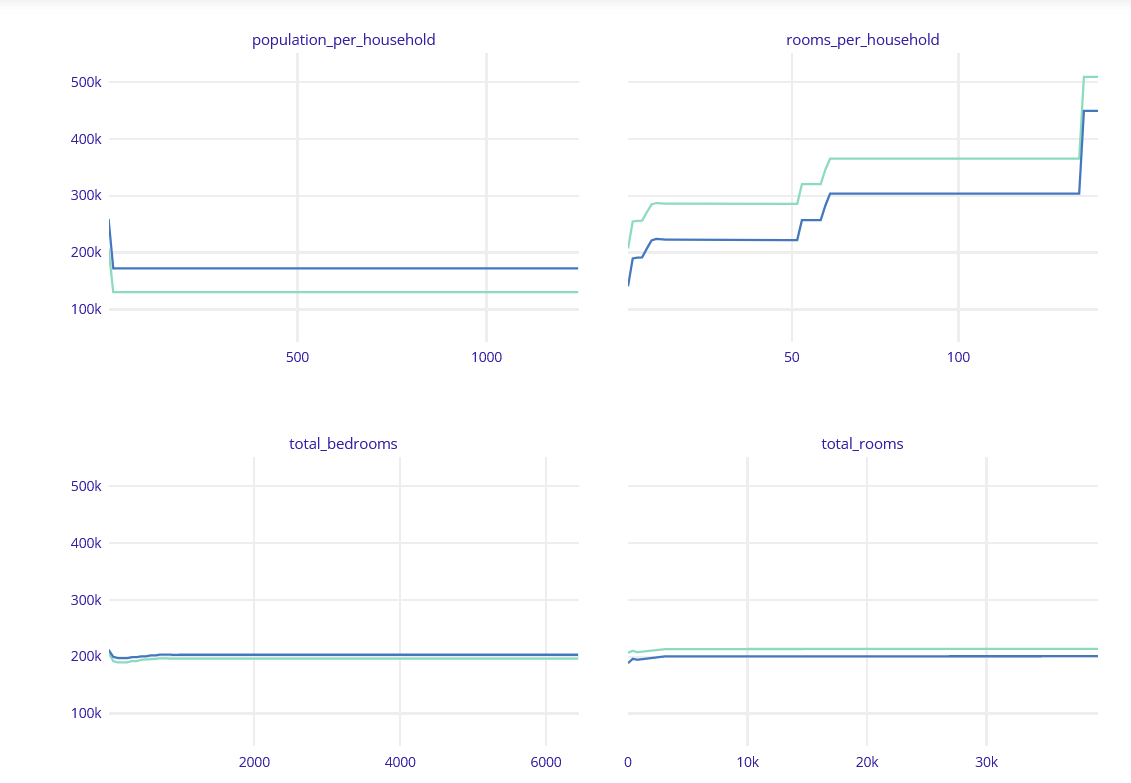

In [8]:
from IPython.display import Image
from IPython.display import display
pdp1 = Image(filename='alepdp1.png')
pdp2 = Image(filename='alepdp2.png')
pdp3 = Image(filename='alepdp3.png') 
display(pdp1, pdp2, pdp3)

Those plots confirm our observations that they are very similar to each other. The changes in direction are the same throughout the plots, the only thing that differs is the value. 

## Summary

Parallel lines on PDP show us, that the model cannot find any interactions between variables. It is also confirmed by ALE, which are also parallel to PDP. <br>
When talking about changes in value chained to changes in variables, all the conclusions from Homework 4 for this model still apply. Variables with the biggest dispersion are `longitude`, `latitude`, `median income` and `rooms per household`. Other variables are mostly constant or close to constant.